<a href="https://colab.research.google.com/github/barabonda/SK-AI-FLY/blob/main/2%EC%A3%BC%EC%B0%A8/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC(DecisionTree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

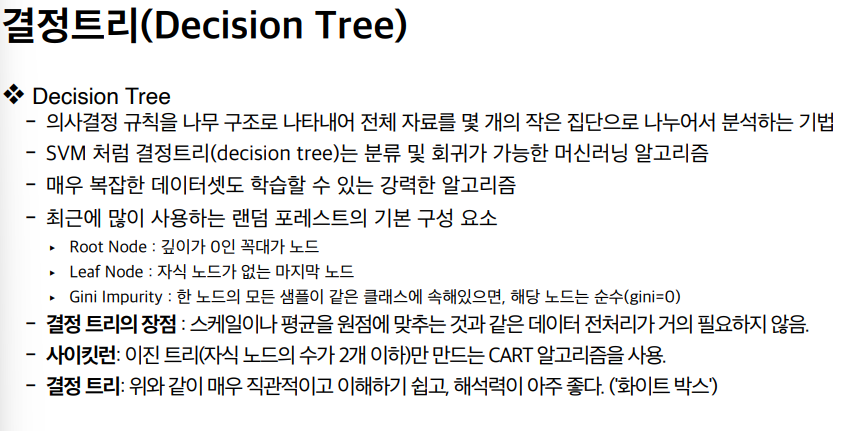

In [55]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

iris = datasets.load_iris()
dfX = pd.DataFrame(iris.data, columns=iris.feature_names)
dfy = pd.DataFrame(iris.target, columns=['target'])

dfX.head()

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)

In [3]:
X_train = X_train.values
X_test = X_test.values

y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

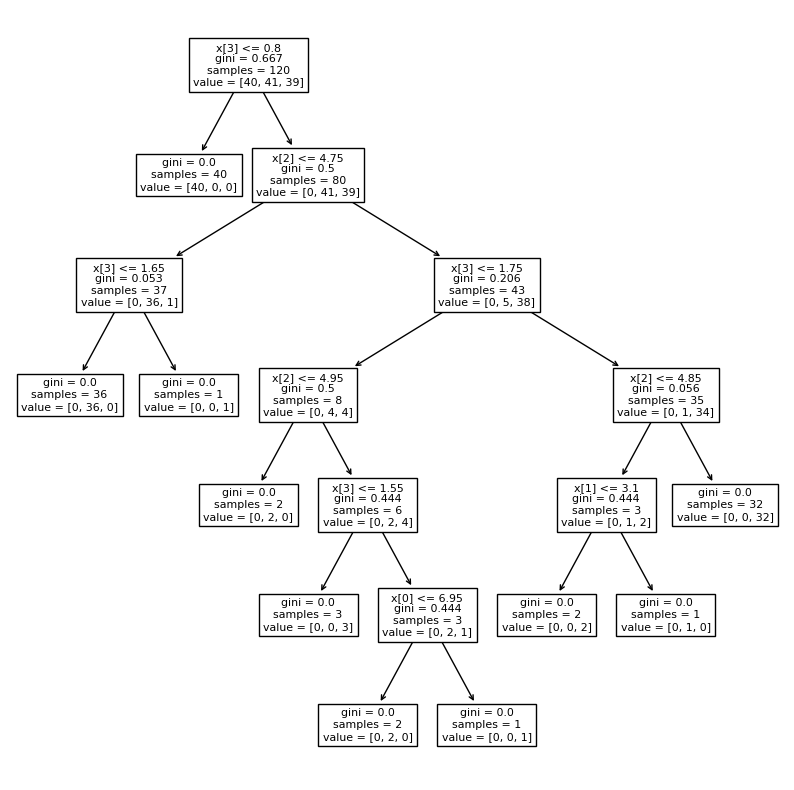

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [5]:
y_pred = dtc.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [6]:
from sklearn.metrics import *
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


기준값  
gini가 0이 될때까지 쭉 depth를 하지만
그렇게 까지 안해도될 때가 있다.
class 분할  
depth를 굳이 gini

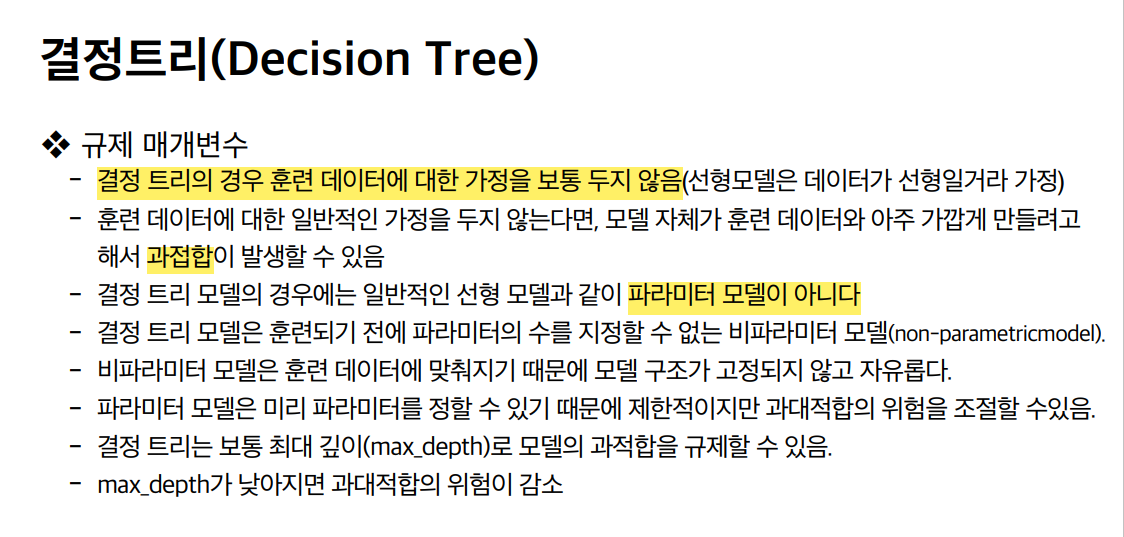

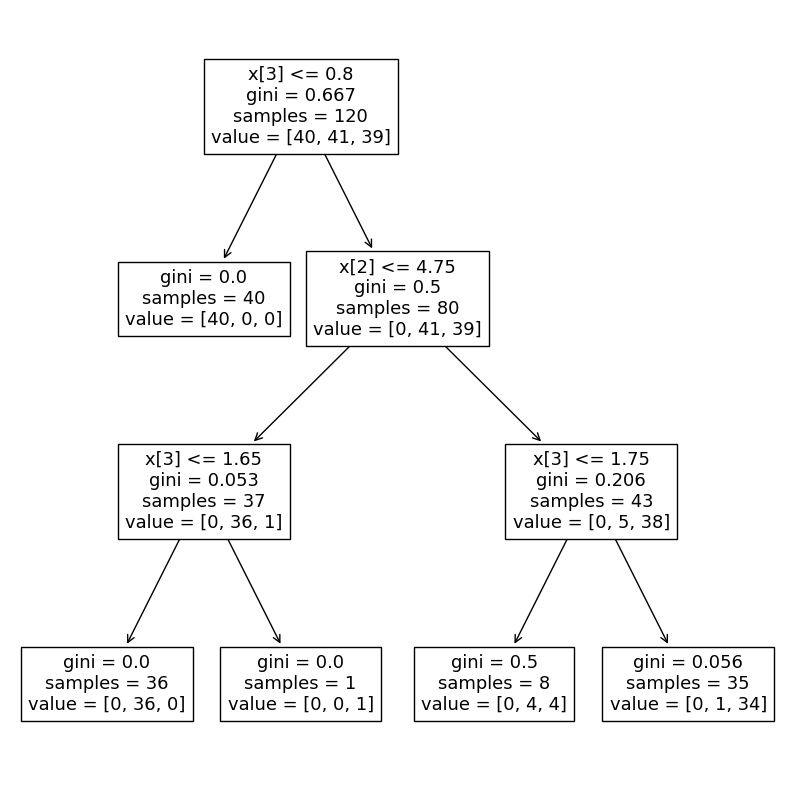

In [7]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
plt.figure(figsize=(10,10))
plot_tree(dtc)
plt.show()

In [8]:
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("정확도 : ", acc)

정확도 :  1.0


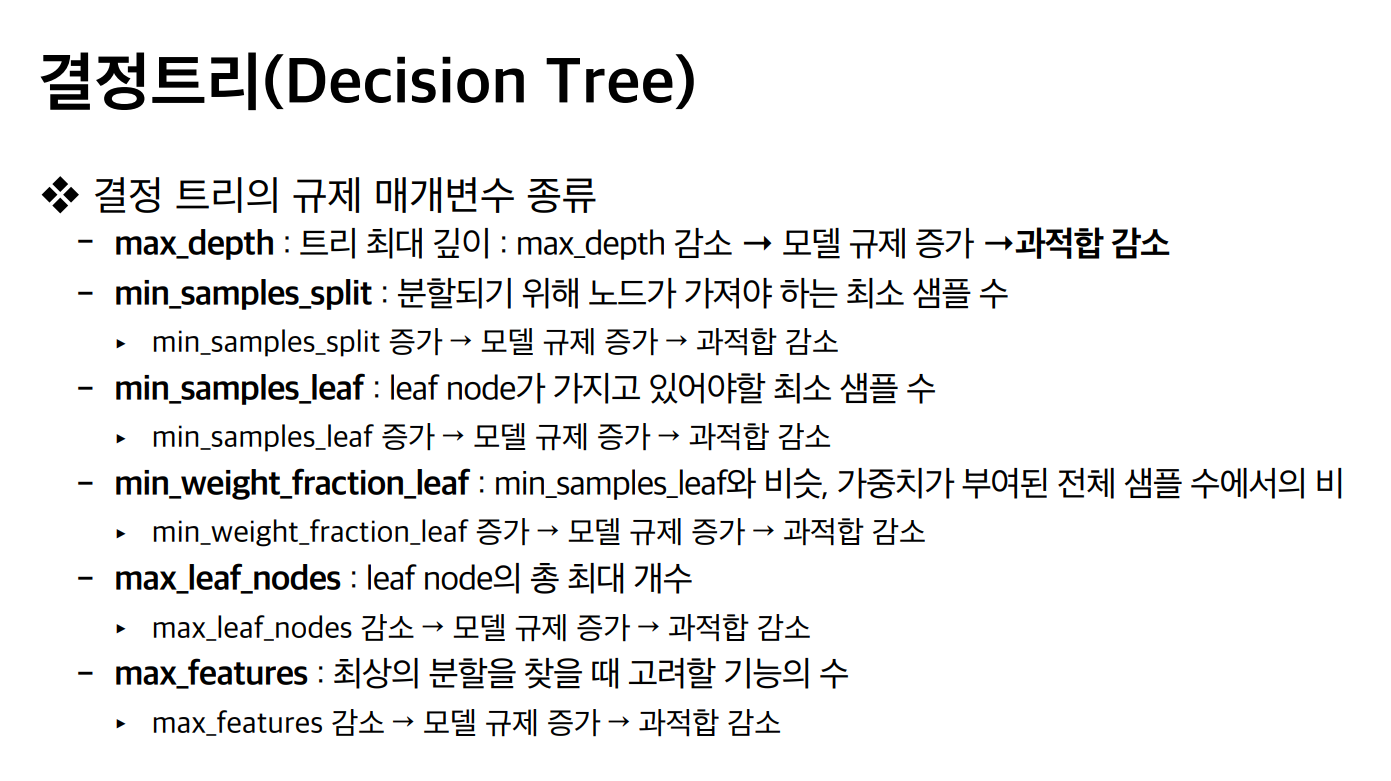

In [44]:
pen = pd.read_csv('/content/penguins_size.csv')
penguins = pd.DataFrame(pen)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [47]:
target = pd.get_dummies(penguins['species'])
target[:1]

,Adelie,Chinstrap,Gentoo
0,1,0,0


In [48]:
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [49]:
# target 수정하기
penguins['species'] = penguins['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0, 1, 2])

In [50]:
# null 다 없애버리기
penguins.dropna(inplace = True)

In [51]:
# check
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [52]:
X_data = penguins.drop(['species', 'island', 'sex'], axis = 1)
y_data = penguins['species']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.1, random_state = 3)

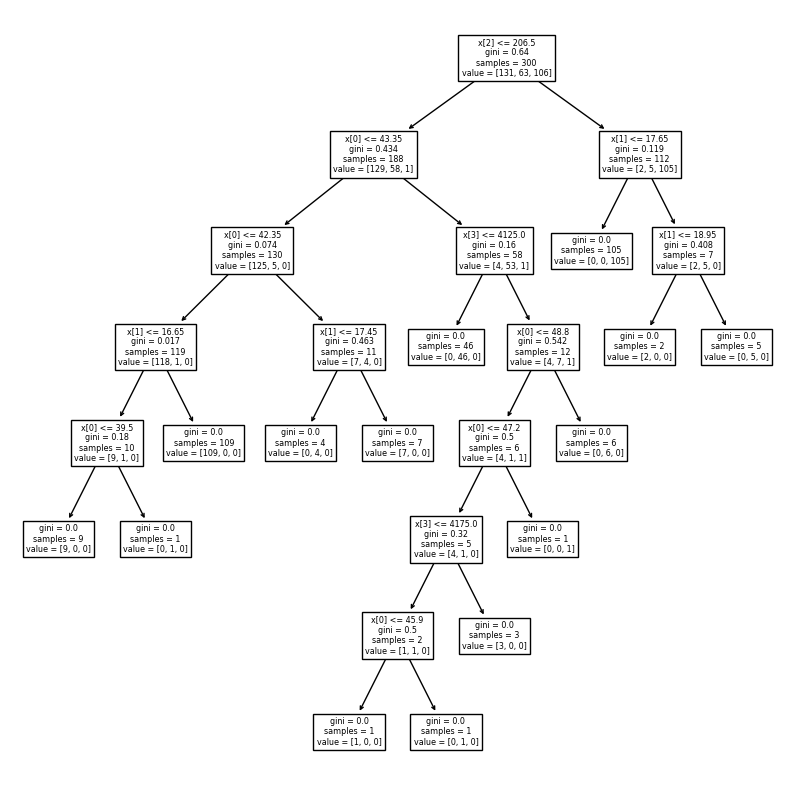

In [53]:
#noscale
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

plt.figure(figsize=(10,10))
plot_tree(tree)
plt.show()

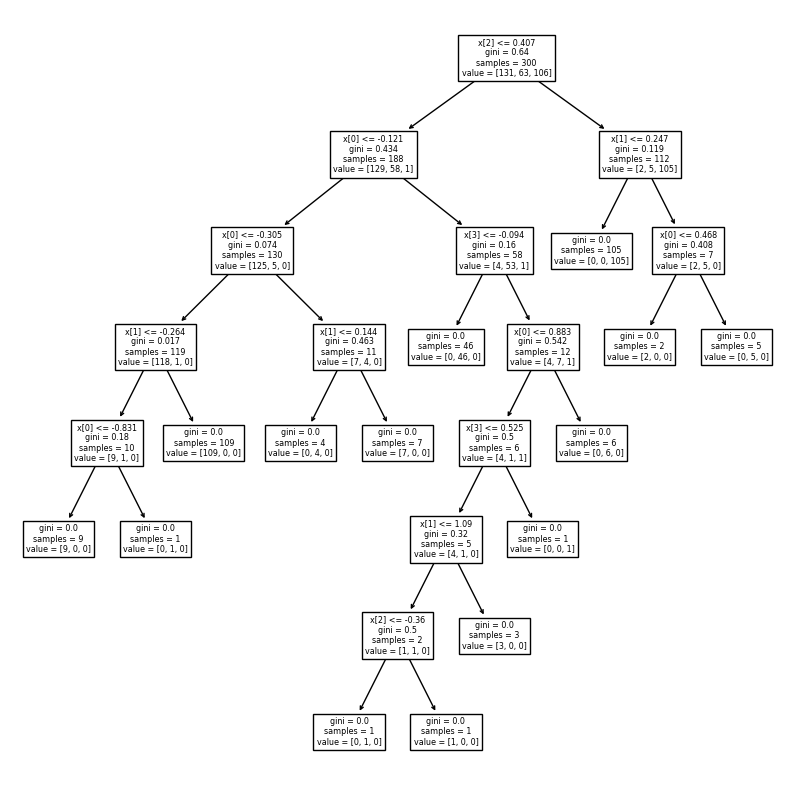

In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

tree2 = DecisionTreeClassifier()
tree2.fit(X_train_scaled, y_train)

plt.figure(figsize = (10,10))
plot_tree(tree2)
plt.show()